# Artificial Intelligence

###  1.	Using any CSP (Constraint Satisfaction Problem) framework (using variables, value domains, and constraints), discover if the above problems can be solved and if so detail who would be in hired.




Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs:

2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.
Assume that if a person has two abilities, he or she can take on two roles in the company.

So Ciara narrowed down her selections to the following people:

- __Name & Abilities__
- Peter : Python and AI
- Juan : Web and AI
- Jim : AI and Systems
- Jane : Python and Database
- Mary : Web and Systems
- Bruce : Systems and Python
- Anita : Web and AI

### Scenario 1:

Suppose Ciara knows Python, and only has funds to hire __three__ more people.


__Variables__: The variables are the people (Peter, Juan, Jim, Jane, Mary, Bruce, Anita). Each person represents a variable that needs to be assigned a role based on their abilities.

__Value Domains__: The domain of each variable (person) is their set of abilities. For example, the domain for Peter is {"Python", "AI"}.

__Constraints__:
- Each person can be assigned only to roles matching their abilities.
- The total number of people hired should be three (excluding Ciara).
- The required roles in the company (_'constraints'_) must all be filled. This includes 1 Python Programmer, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.


### Scenario 2:

Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer, so they need 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.

Variables and Value Domains remains the same as scenarion 1.

Constraints:

- Juan becomes Ciara's partner and will be moved to pre-selected list.
- The total number of people hired must be up to four (excluding Ciara and Juan)
- The required roles in the company `constraint` must all be filled. This includes 2 Python Programmer, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.


### Code Explanation

- **`constraint`**: 
  - _Description_: A dictionary representing the required skills or roles for the project. Each skill has a corresponding number indicating how many people with that skill are needed.
  - _Adjustments_: The required count for each skill is adjusted to account for the skills of pre-selected individuals like Ciara and Juan.

- **`pre_selected`**:
  - _Description_: A set of individuals who are pre-selected for the team due to their specific skills or other constraints. For instance, Ciara is always selected for her Python skill.
  - _Operation_: The script adjusts the `variables_domain` and `constraint` based on the skills of these pre-selected individuals.

- **Removing pre-selected individuals**:
  - _Process_: The script iteratively removes pre-selected individuals from the `variables_domain` and adjusts the `constraint_2` accordingly to reflect their contribution to the required skills.

- **`meets_requirements` function**: 
  - _Description_: A function that checks if a particular combination of people meets the required skills. It tallies the skills of the combination and compares this against the `constraint` to determine if it's a valid team setup.
  - _Process_: 
    1. Initialize a count for each required skill.
    2. Tally the skills for each individual in the combination.
    3. Compare the tally against the requirements in `constraint`.

- **Generating Possible Teams**:
  - _Description_: The script generates all combinations of 1 to 4 people from the remaining candidates (not including pre-selected ones) and checks each combination to see if it meets the required skills.
  - _Storage_: Valid combinations that meet all requirements are stored in `possible_teams`, each including the pre-selected individuals.

- **`possible_teams`**:
  - _Description_: A list that stores each team combination that successfully covers all the required skills. Each team includes the pre-selected individuals along with the combination of other candidates that, together, fulfill all role requirements.


In [1]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusted variables and domain of the problem where variables = people, and domain = roles;
variables_domain = {
    "Peter": {"Python", "AI"},
    "Juan": {"Web", "AI"}, 
    "Jim": {"AI", "Systems"},
    "Jane": {"Python", "Database"},
    "Mary": {"Web", "Systems"},
    "Bruce": {"Systems", "Python"},
    "Anita": {"Web", "AI"}, 
    "Ciara": {"Python"}  
}

# Define the required skills
constraint = Counter({"Python": 2, "AI": 3, "Web": 1, "Database": 1, "Systems": 1}) # For Scenario 2 add one AI. 

# Pre-selected individuals
pre_selected = set() #Used for GUI
#pre_selected = {"Ciara", "Juan"} # For Scenarion 2
#pre_selected = {"Ciara"} # For Scenarion 1

# Remove pre-selected individuals from domain
for person in pre_selected:
    # Reduce the count of required skills based on pre-selected individuals
    for skill in variables_domain[person]:
        if skill in constraint:
            constraint[skill] -= 1
    del variables_domain[person]

# Function to check if a combination of people meets the required skills
def meets_requirements(people, constraint, domains):
    skills_count = {skill: 0 for skill in constraint}
    for person in people:
        for skill in domains[person]:
            if skill in skills_count:
                skills_count[skill] += 1
    # Check if all required skills are met or exceeded
    return all(skills_count[skill] >= constraint[skill] for skill in constraint)

# Generate all possible combinations of 4 or fewer people from the remaining candidates
possible_teams = []
for r in range(1, 5): # For scenario 2
#for r in range(1, 4):  # For scenario 1
    for team in combinations(variables_domain.keys(), r):
        if meets_requirements(team, constraint, variables_domain):
            possible_teams.append(pre_selected.union(team))  # Add pre-selected individuals to the team

possible_teams

[{'Jane', 'Jim', 'Juan', 'Peter'}, {'Anita', 'Jane', 'Jim', 'Peter'}]

### 2.	Discuss in detail how using Constraint Satisfaction finds an answer or finds no solution to the problems in Tasks for Artificial Intelligence part 1. How does this differ from standard algorithmic solutions? 

### Constraint Satisfaction Problem (CSP)

A Constraint Satisfaction Problem (CSP) involves finding a solution that satisfies a number of constraints or conditions. It is widely used in fields like artificial intelligence for scheduling, assigning, and planning problems. CSPs typically involve variables, domains for each variable, and constraints that describe allowable combinations of values. The goal is to assign values to all variables in a way that doesn't violate any constraints (Russell & Norvig, 2010). This framework is particularly effective in scenarios like employee scheduling, where multiple conditions must be met simultaneously.


- _A Constraint Satisfaction Problem (CSP) is typically defined by three fundamental components:_ (Wikipedia Contributors, 2019)

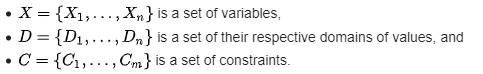

 A more efficient method uses the backtracking paradigm (BT) that is the most common algorithm for performing
systematic search. Backtracking incrementally attempts to extend a partial solution toward a
complete solution, by repeatedly choosing a value for another variable. 

The backtracking paradigm carefully builds a solution to a problem by testing using many options and discarding those that don't work. It attempts to gradually expand the partial solution that it begins with. It selects a variable and gives it a consistent value at each step, while at the same time ensuring that the current sequence of assignments doesn't violate any constraints. If a constraint is violated, the algorithm doesn't proceed further down that path and instead goes back (or "backtracks") to the previous step to try a different value or path. (Barták, Morris, & Venable, 2014)

A common issue with most backtracking-based systematic search algorithms is that there are a lot of "backtracks" to other options, which reduces system efficiency. There are specific situations where it is feasible to fully remove the necessity for going back. Additionally, there are methods that select a unique variable ordering to minimize the amount of backtracking.




1. **Variables (X):**
   - Each potencial person: Peter, Juan, Jim, Jane, Mary, Bruce, Anita and Ciara).
   - Each variable can take on values from a domain.

2. **Domains (D):**
   - Each domain is a set of possible values that its corresponding variable can assume. In this case, the abilities each person (Variables) has. 
   - Domains can be finite or infinite, depending on the specific CSP.

3. **Constraints (C):**
   - Each constraint involves some subset of the variables and specifies the allowable combinations of values those variables can take. Constraints can be represented in various ways, including explicit lists of allowable combinations (extensional constraints) or more general mathematical relations or logical propositions (intensional constraints).
   
 - **Scenario 1:**
   1. There must be 2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer;
   2. Ciara knows Python, so 1 Python role is taken (remaining 1);
   3. The company can hire only 3 people to fill the rest of the roles. 
   
   - **Scenario 2:**
   1. There must be 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer;
   2. This time, Juan and Ciara have to be on the list of hired people with their respective abilities.
   3. The company can hire max of 4 people for the rest of the roles.
   

### Objective:

The objective of a CSP is to find an assignment of values to variables that satisfies all constraints. 

### Solution:

- The CSP algorithm would try different combinations of the candidates, assigning them to various roles while ensuring all constraints are met.
- A solution to the CSP is an assignment of values to all variables that does not violate any constraints. Depending on the problem, there might be none, one, or many possible solutions. 
- It uses backtracking to explore all possible configurations going backwards and checking if any constraint is violated.
- Scenario 1 found only two solutions. The reason is that only 3 people were hired to fulfill 6 roles, making the constraints harder to satisfy.
- Scenario 2 found close to ten solutions. The reason is that Juan is now Ciara's partner, and both must be part of the hired team. Now, the constraints are much easier to satisfy, as there are 5 abilities left to be distributed among 4 people.

### Conclusion

Most algorithms for solving CSPs search systematically through the possible assignments of values to variables. These algorithms are goint to find a solution, if one exists, or to prove that the problem is unsatisfiable. (Brailsford, Potts & Smith, 1999)

CSPs are a powerful abstract model for representing and solving many real-world problems in various fields such as scheduling, planning, resource allocation, configuration, and spatial reasoning. They offer a structured way to break down complex problems into manageable components (variables, domains, and constraints) and apply systematic methods to find solutions.

### 3.	These problems be solved using several other algorithm’s we have studied in the module. Choose one of these algorithms and discuss your answer in detail including a proof of your hypothesis in code 

### Integer Linear Programming (ILP)


Integer Linear Programming (ILP) is a type of mathematical optimization or feasibility program used to find the best solution out of a set of possible solutions. In ILP:
- Variables are restricted to be integers.
- The objective is often to minimize or maximize some linear function of those integers.

The assumption of divisibility, which limits decision variables to noninteger values, is the main drawback of linear programming. However, in several real-world situations, decision variables needs to have integer values such as assigning people, machines, or vehicles to activities. (Hillier & Lieberman, 2010)

The ILP algorithm finds every feasible unique solution by use of a unique twist on iterative integer linear programming: solution blocking. It uses integer constraints (binary variables for assignments and hiring) along with linear programming techniques for optimization (minimizing the number of hired people), and iteratively adds constraints to fully explore the solution space. When addressing issues involving resource allocation and operations research, where specific goals must be optimized within predetermined parameters, this kind of problem-solving is most prevalent.


#### How ILP Works

**Variable Definition:**  A decision point is represented by each variable. For instance, a variable may indicate whether a person is assigned to a specific job in a resource allocation problem (1 for yes, 0 for no).

**Constraints:** Setting requirements that all solutions must adhere to is necessary for ILP. These can ensure that resources aren't over-allocated, and that only feasible solutions are considered.
Typical restrictions include making sure the right amount of roles are filled or that no one is put in a role that isn't a good fit for them based on their abilities.

**Objective Function:** What you want to optimize is the objective function, which might be anything like maximizing efficiency or lowering expenses. Sometimes, the goal could be as simple as identifying any feasible solution that satisfies the constraints.

#### Advantages of ILP

- **Optimality:** ILP can provide the best possible solution according to the objective function and within the constraints.
- **Flexibility:** It can deal with a broad range of problem types, including complex and large-scale problems.
- **Universality:** ILP models are broadly applicable in numerous fields such as scheduling, resource allocation, budgeting, etc. (Hillier & Lieberman, 2010)

####  Conclusion

The inconsistency of Integer Linear Programming (ILP) algorithms in solving integer problems represents a notable drawback. While theoretical demonstrations assert these algorithms' convergence within a finite number of iterations, practical implementation on computers can yield a different experience. As such, it's important to consider these computational limitations and the potential for inconsistency when examining and applying ILP algorithms.(Taha, 2017).

In [2]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum, LpStatus

# Variables and their domains (abilities)
variables_domain_2 = {
    "Peter": {"Python", "AI"},
    "Juan": {"Web", "AI"},
    "Jim": {"AI", "Systems"},
    "Jane": {"Python", "Database"},
    "Mary": {"Web", "Systems"},
    "Bruce": {"Systems", "Python"},
    "Anita": {"Web", "AI"}
}

# Defined roles that need to be filled, considering Ciara's contribution
role_needs = {"Python": 1, "AI": 2, "Web": 1, "Database": 1, "Systems": 1}

# Initialize the problem
prob = LpProblem("Scenario_1", LpMinimize)

# Define variables: x[person, role] is 1 if the person is assigned to the role
x = LpVariable.dicts("assignment", [(person, role) for person in variables_domain_2 for role in variables_domain_2[person]], cat='Binary')

# Define a helper variable for each person indicating if they are hired
hired = LpVariable.dicts("hired", variables_domain_2.keys(), cat='Binary')

# Objective function: Minimize the number of people hired
prob += lpSum(hired[person] for person in variables_domain_2)

# Constraints

# Ensure each role has enough people
for role in role_needs:
    prob += lpSum(x[(person, role)] for person in variables_domain_2 if role in variables_domain_2[person]) == role_needs[role]

# Link the hiring variable with the assignment variables
for person in variables_domain_2:
    prob += hired[person] * 2 == lpSum(x[(person, role)] for role in variables_domain_2[person])

# Ensure exactly 3 people are hired
prob += lpSum(hired[person] for person in variables_domain_2) == 3

# List to store all unique solutions
all_solutions = []

# Function to add constraints that block the previous solutions
def block_previous_solutions(prob, solutions, x):
    for solution in solutions:
        # Creating a unique constraint for each previous solution found
        prob += lpSum(x[person, role] for (person, role) in solution.keys() if solution[(person, role)] == 1) <= sum(solution.values()) - 1


while True:
    # Solve the problem
    prob.solve()

    # Check if a new solution is found
    if LpStatus[prob.status] == 'Optimal':
        # Extract the current solution
        current_solution = {(person, role): x[(person, role)].varValue for (person, role) in x.keys() if x[(person, role)].varValue == 1}

        # Check for uniqueness of the solution
        if current_solution not in all_solutions:
            all_solutions.append(current_solution)
            print("Solution #", len(all_solutions))
            
            # Print each person's name with their assigned roles
            assignments = {person: [] for person in variables_domain_2}
            for (person, role) in current_solution.keys():
                if current_solution[(person, role)] == 1:  # If the person is assigned to the role
                    assignments[person].append(role)  # Append the role to the person's list of roles

            # Print assignments
            for person, roles in assignments.items():
                if roles:  # If the person has roles assigned
                    print(f"{person} : {', '.join(roles)}")

            # Add a constraint to block the current solution
            block_previous_solutions(prob, [current_solution], x)

        else:
            # If the solution is already found, break the loop
            break
    else:
        # No more solutions are available
        break

print(f"Total {len(all_solutions)} unique solutions found.")


Solution # 1
Juan : Web, AI
Jim : Systems, AI
Jane : Database, Python
Solution # 2
Jim : Systems, AI
Jane : Database, Python
Anita : Web, AI
Total 2 unique solutions found.


# Data Visualization

- Use appropriate visualisations to help communicate the CSP scenario and the corresponding solutions, if any, to the appropriate stakeholders.
- Create interactive visualisation(s) to allow a user to explore alternate constraint scenarios
- Create GUI(s) to allow a user to explore alternate constraint scenarios
- Include in your report a section for a theoretical AI “team” you are part of, explaining the visualisation processes and rationalising your visualisation decisions (eg chart choice, colour, layout etc).


In [3]:
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.ticker import MaxNLocator


# Your initial constraint and pre-selected data
skill_constraints = Counter({"Python": 2, "AI": 2, "Web": 1, "Database": 1, "Systems": 1})
employee_skills = {
    "Peter": {"Python", "AI"},
    "Juan": {"Web", "AI"}, 
    "Jim": {"AI", "Systems"},
    "Jane": {"Python", "Database"},
    "Mary": {"Web", "Systems"},
    "Bruce": {"Systems", "Python"},
    "Anita": {"Web", "AI"}, 
    "Ciara": {"Python"}  
}
#pre_selected = set()

In [4]:
# Function to check if a combination of people meets the required skills
def meets_requirements(people, skill_constraints, domains):
    skills_count = Counter(skill_constraints)
    for person in people:
        for skill in domains[person]:
            if skill in skills_count:
                skills_count[skill] -= 1
    return all(count <= 0 for count in skills_count.values())

In [5]:
# Initialize main application window
root = tk.Tk()
root.title("Team Constraints Explorer")

# Define layout and frames with improved aesthetics
mainframe = ttk.Frame(root, padding="10 10 10 10")
mainframe.grid(column=0, row=0, sticky=(tk.W, tk.E, tk.N, tk.S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
root.configure(bg='#333')

# Configure ttk style for dark theme
style = ttk.Style()
style.configure("TFrame", background='#333', foreground='white')
style.configure("TButton", font=('Helvetica', 12), background='#555', foreground='black')
style.configure("TLabel", font=('Helvetica', 12), background='#333', foreground='white')
style.configure("TCheckbutton", font=('Helvetica', 12), background='#333', foreground='white')

In [6]:
# Function to calculate and display teams
def calculate_teams():
    try:
        updated_constraints = Counter({role: int(input_box.get()) for role, input_box in zip(skill_constraints.keys(), role_inputs)})
        total_people = int(total_people_input.get())
        pre_selected = {name for name, var in pre_selected_checks.items() if var.get()}
        possible_teams = []

        for r in range(1, total_people + 1 - len(pre_selected)):
            for team in combinations(set(employee_skills.keys()) - pre_selected, r):
                full_team = pre_selected.union(team)
                if meets_requirements(full_team, updated_constraints, employee_skills):
                    possible_teams.append(full_team)

        output_area.delete(1.0, tk.END)
        if possible_teams:
            for team in sorted(possible_teams, key=lambda x: len(x)):
                output_area.insert(tk.END, f"{', '.join(sorted(team))}\n")
        else:
            output_area.insert(tk.END, "No possible teams meet the requirements.\n")

        update_visualization(possible_teams)
    except ValueError as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

In [7]:
# Function to update visualization
def update_visualization(possible_teams):
    # Create a new top-level window or use an existing one
    if not hasattr(update_visualization, "plot_window") or not update_visualization.plot_window.winfo_exists():
        update_visualization.plot_window = tk.Toplevel(root)
        update_visualization.plot_window.title("Visualizations")
        update_visualization.plot_window.configure(bg='#333')

    # Clear any previous figures in this window
    for widget in update_visualization.plot_window.winfo_children():
        widget.destroy()

    # Your usual visualization setup code...
    individual_counts = Counter([member for team in possible_teams for member in team])
    team_sizes = [len(team) for team in possible_teams]
    total_teams = len(possible_teams)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    if total_teams > 0:
        # Bar chart for individual participation
        individuals = list(individual_counts.keys())
        counts = list(individual_counts.values())
        percentages = [count / total_teams * 100 for count in counts]
        bars = axs[0].bar(individuals, counts, color='skyblue')
        for bar, pct in zip(bars, percentages):
            yval = bar.get_height()
            axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{pct:.1f}%', ha='center', va='bottom')
        axs[0].set_title('Participation of Employees in Teams')
        axs[0].set_xlabel('Employees')
        axs[0].set_ylabel('Number of Teams Participated In')
        axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))

        # Histogram for team size distribution
        axs[1].hist(team_sizes, bins=range(min(team_sizes), max(team_sizes)+2), color='lightgreen', align='left')
        axs[1].set_title('Distribution of Team Sizes')
        axs[1].set_xlabel('Team Size')
        axs[1].set_ylabel('Number of Teams')
        axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
        axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    else:
        # No teams message
        axs[0].text(0.5, 0.5, 'No possible teams', ha='center', va='center', transform=axs[0].transAxes)
        axs[1].text(0.5, 0.5, 'No possible teams', ha='center', va='center', transform=axs[1].transAxes)

    canvas = FigureCanvasTkAgg(fig, master=update_visualization.plot_window)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

In [8]:
# Setting up widgets with refined layout and styles
# Input for role-specific numbers and other inputs
role_labels = []
role_inputs = []
for i, role in enumerate(skill_constraints.keys(), start=1):
    ttk.Label(mainframe, text=f"{role} :").grid(column=1, row=i, sticky=tk.W)
    input_box = ttk.Entry(mainframe)
    input_box.grid(column=2, row=i, sticky=(tk.W, tk.E))
    role_inputs.append(input_box)

ttk.Label(mainframe, text="Total people to hire:").grid(column=1, row=len(skill_constraints)+1, sticky=tk.W)
total_people_input = ttk.Entry(mainframe)
total_people_input.grid(column=2, row=len(skill_constraints)+1, sticky=(tk.W, tk.E))

pre_selected_checks = {}
ttk.Label(mainframe, text="Pre-select individuals:").grid(column=1, row=len(skill_constraints)+2, sticky=tk.W)
for i, individual in enumerate(employee_skills.keys(), start=0):
    var = tk.BooleanVar()
    check = ttk.Checkbutton(mainframe, text=individual, variable=var)
    check.grid(column=2, row=len(skill_constraints)+3+i, sticky=tk.W)
    pre_selected_checks[individual] = var

# Calculate Teams Button
calculate_button = ttk.Button(mainframe, text="Calculate Teams", command=calculate_teams)
calculate_button.grid(column=2, row=len(skill_constraints)+3+len(employee_skills), sticky=tk.W)
calculate_button.configure(style='TButton')

# Output area for teams
ttk.Label(mainframe, text="Possible Teams:").grid(column=1, row=len(skill_constraints)+4+len(employee_skills), sticky=tk.W)
output_area = tk.Text(mainframe, height=10, width=50)
output_area.grid(column=1, row=len(skill_constraints)+5+len(employee_skills), columnspan=2, sticky=(tk.W, tk.E))
scrollbar = ttk.Scrollbar(mainframe, command=output_area.yview)
scrollbar.grid(column=3, row=len(skill_constraints)+5+len(employee_skills), sticky=(tk.N, tk.S))
output_area['yscrollcommand'] = scrollbar.set


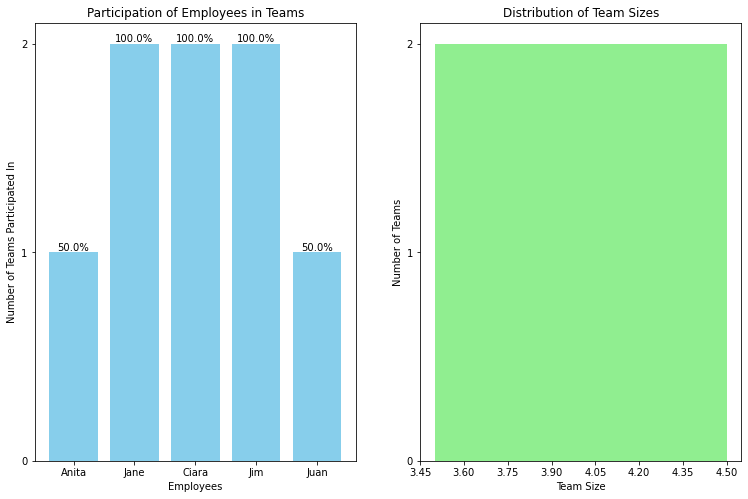

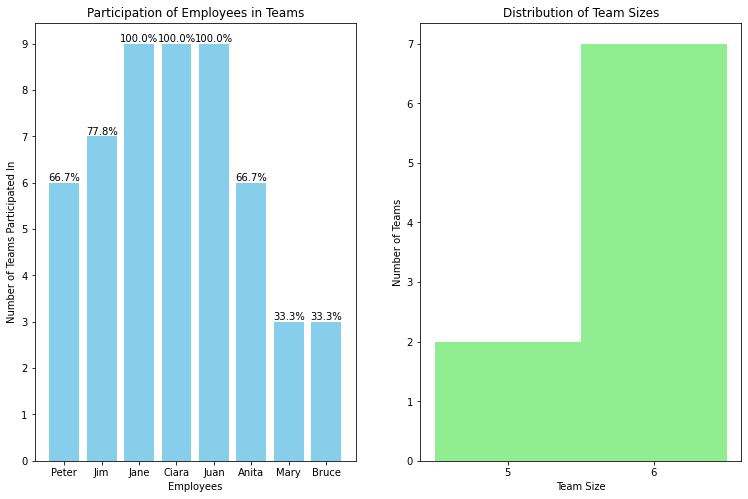

In [9]:
# Run the application
root.mainloop()

## References
- Stuart Jonathan Russell; Peter Norvig (2010). Artificial Intelligence: A Modern Approach. Prentice Hall. p. Chapter 6. 
- docs.python.org. (n.d.). itertools — Functions creating iterators for efficient looping — Python 3.9.1 documentation. [online] Available at: https://docs.python.org/3/library/itertools.html.

- Barták, R., Morris, R.A. and K. Brent Venable (2014). CONSTRAINT PROPAGATION AND BACKTRACKING-BASED SEARCH A brief introduction to mainstream techniques of constraint satisfaction. 
- Wikipedia Contributors (2019). Constraint satisfaction problem. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Constraint_satisfaction_problem.

- www.cs.cmu.edu. (n.d.). Constraint Satisfaction Problems. [online] Available at: https://www.cs.cmu.edu/~15281/coursenotes/constraints/index.html [Accessed 28 Dec. 2023].

- Brailsford, S.C., Potts, C.N. and Smith, B.M. (1999). Constraint satisfaction problems: Algorithms and applications. European Journal of Operational Research, 119(3), pp.557–581. doi:https://doi.org/10.1016/s0377-2217(98)00364-6.

- https://docs.pulpproject.org/pulpcore/
- Taha, H.A. (2017). Operations research an introduction. Boston: Pearson.
- Rodriguez, T.S. (2022). Linear Programming: optimizing solutions with Python using PuLP. [online] Medium. Available at: https://medium.com/@telmosubirar/linear-programming-optimizing-solutions-with-python-using-pulp-e0c4379696c8 [Accessed 28 Dec. 2023].
- Hillier, F.S. and Lieberman, G.J. (2010). Introduction to operations research. New York, Ny: Mcgraw-Hill.
‌
